## Array processing lecture research project 

The goal of this notebook is to work on a research project whose goal is to find the localization of a speaker using an array mounted below a drone.

The studied case comes from the [DREGON dataset](http://dregon.inria.fr/datasets/dregon/) developed by [Antoine Deleforge](https://members.loria.fr/ADeleforge/) at INRIA and described in 

> [DREGON: Dataset and Methods for UAV-Embedded Sound Source Localization](https://hal.inria.fr/hal-01854878/file/2018_iros_strauss.pdf), Martin Strauss, Pol Mordel, Victor Miguet and Antoine Deleforge, IEEE/RSJ International Conference on Intelligent Robots and Systems (IROS) 2018.

More specifically, the goal is to develop a simulation environment that corresponds to an experimental case given in the dataset, to validate a new localization methods that you developed from the literature and compare its performance against beamforming. 

---

## Studied case

In this project, we focus on the *Noise-Free Recordings*, and especially on the case in which the loudspeaker emits white noise (*DREGON_clean_recordings_whitenoise.zip*). All the information about this case are described in the dataset page.

Your goal as a researcher is to simulate this configuration, in order to compare one of the methods Deleforge *et al.* suggests as a localization method to find the angular direction of the acoustic source, MUSIC, to the beamforming you have seen during the lecture. At the end, you should be able to conclude on the advantages of MUSIC compared to beamforming.

This Jupyter Notebook will guide you through the process of creating this simulation environment, following several steps:
- Create the source signal
- Set the geometric configuration
- Propagate the signal to the array
- Develop your localization method
- Display your acoustic map
- Compare both localization methods
- Validate observations on real data 

---

## Code 

In [1]:
# Import the needed libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.signal as signal
import scipy.io as sio
import sounddevice as sd

In [2]:
# Command needed to be able to plot within the Jupyter Notebook
%matplotlib widget

#### Create the source signal 

In [3]:
# Acoutic parameters
pref = 2*10**(-5)
c0 = 343

In [4]:
# We work with a white noise
sig_dur = # Choose
fs = # Choose
Ts = # Choose
t = np.arange(0, sig_dur, Ts)
sig_std = # Choose
np.random.seed(10)
src_sig = sig_std*np.random.randn(# Choose)

SyntaxError: invalid syntax (1483914496.py, line 2)

In [5]:
# Plot the signal to see how it looks like
plt.figure()
plt.plot(# Choose)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (Pa)")

SyntaxError: invalid syntax (828374762.py, line 5)

In [6]:
# Check some properties of the signal
power = # Choose
print(power)

SyntaxError: invalid syntax (2683263672.py, line 2)

#### Geometric configuration 

In [7]:
# Import the array geometry
mics = np.loadtxt("micPos.txt")
Nmics = mics.shape[0]

In [8]:
# Set the source at a specific position
src_pos = np.array([# Choose, # Choose, # Choose])

SyntaxError: unexpected EOF while parsing (3945218929.py, line 2)

In [9]:
# Create the grid on which the source will be searched
x = # Choose
y = # Choose
z = # Choose
grid  = np.vstack(np.meshgrid(x,y,z)).reshape(3,-1).T

SyntaxError: invalid syntax (662380518.py, line 2)

In [10]:
# Plot the configuration
plt.figure()
plt.title("Simulated configuration")
ax = plt.axes(projection="3d")
ax.scatter(# Choose, c='C1')
ax.scatter(# Choose, c='C2')
ax.scatter(# Choose, c='C0')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend(["Array", "Grid", "Source"])

SyntaxError: invalid syntax (1477597477.py, line 9)

#### Simulate the propagation towards the array: direct model 

In [12]:
# We choose here to propagate the signal using the spherical model
prep_sigs = np.tile(src_sig, Nmics).reshape(Nmics, -1)

# HOW TO DO THE PROPAGATION ??

mics_sigs = 0 # To arrive here

NameError: name 'src_sig' is not defined

NameError: name 'mics_sigs' is not defined

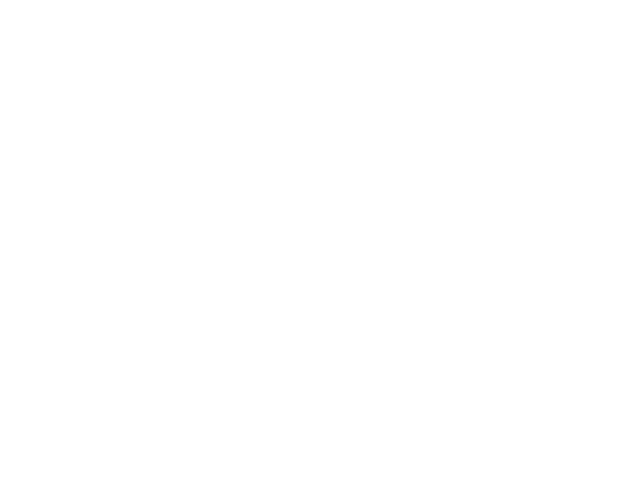

In [13]:
# Plot the array received signals
plt.figure()
ticks_lab = []
ticks_pos = []
for k_sig, sig in enumerate(mics_sigs):
    plt.plot(t, 10*k_sig + sig)
    ticks_pos.append(10*k_sig)
    ticks_lab.append("Mic. {}".format(k_sig+1))
    
plt.yticks(ticks_pos, ticks_lab)

#### Compute the acoustic map: back-propagation 

###### Beamforming and MUSIC methods 

###### Compute the Cross Spectral Matrix (CSM)

In [220]:
# From the received signals, compute the CSM
bs = # Choose # Block size for the Welch periodogram
df = # Choose # Frequency resolution
Nfreqs = # Choose

# CSM computation
CSM_data = np.zeros((Nmics,Nmics,Nfreqs), dtype=complex)
# HOW TO COMPUTE IT ?

###### Perform the localization method

In [14]:
# Choose the frequency to process
freq = # Choose
k_freq = # Choose # Wave number
n_freq = int(freq/df)

# Compute the acoustic map
BF_map = np.zeros((grid.shape[0]))
MUSIC_map = np.zeros((grid.shape[0]))

# Boucle sur les points de la grille
for k_pt, point in enumerate(grid):
    R_point = # Choose
    g = # Choose
    g_norm = # Choose

    BF_map[k_pt] = # Choose
    MUSIC_map[k_pt] = # Choose

BF_map_plt = BF_map.reshape(# Choose,# Choose)
MUSIC_map_plt = MUSIC_map.reshape(# Choose,# Choose)

SyntaxError: invalid syntax (1504322142.py, line 2)

In [15]:
# Plot the wanted map
MUSIC_map_plt_final = MUSIC_map_plt[::-1,:].T # To have the coordinates the same as in the configuration
plt.figure()
plt.title("MUSIC map")
plt.imshow(10*np.log10(MUSIC_map_plt_final/pref**2), origin="lower", extent=[# Choose,-# Choose,-# Choose,# Choose])
plt.xlabel("y (m)")
plt.ylabel("z (m)")
plt.colorbar()

NameError: name 'MUSIC_map_plt' is not defined

#### Validate with real data 

In [258]:
# Import the data
fs_data, data_int = sio.wavfile.read("Data/CHOOSE_DATA.wav")
data_full = data_int / 32767 # To go in Pascal
t_data = np.arange(0, 1/fs_data*data_full.shape[0], 1/fs_data)

In [259]:
# Listen to it
sig1 = data_full[:,0]
sd.play(sig1, fs_data)

NameError: name 't_data' is not defined

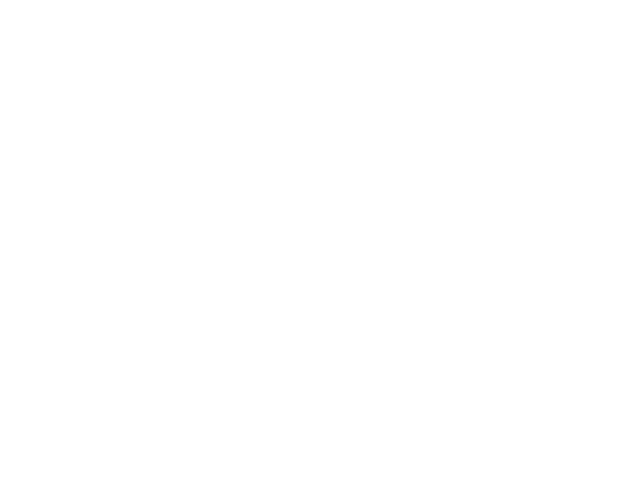

In [16]:
# Plot a signal to see how they look like
plt.figure()
plt.plot(t_data, data_full[:,0])

In [1]:
# Cut the data to have only signal
data = data_full[# Choose,:]
t_cut = t_data[# Choose]

# Plot the cut signal
plt.figure()
plt.plot(t_cut, data[:,0])

SyntaxError: invalid syntax (2796072274.py, line 3)

In [2]:
# Perform the localization
bs = # Choose # Block size for the Welch periodogram
df = # Choose # Frequency resolution
Nfreqs = # Choose

# CSM computation
CSM_data = np.zeros((Nmics,Nmics,Nfreqs), dtype=complex)
# COMPUTE IT
        
# Choose the frequency to process
freq_data = # Choose
k_freq = # Choose
n_freq = # Choose

# Compute the MUSIC map
MUSIC_map_data = np.zeros((grid.shape[0]))

# Create the grid on which the source will be searched
x_data = # Choose
y_data = # Choose
z_data = # Choose
grid_data = np.vstack(np.meshgrid(x_data,y_data,z_data)).reshape(3,-1).T

# Grid point loop
for k_pt, point in enumerate(grid_data):
    R_point = # Choose
    g = # Choose # Steering vector creation
    
    MUSIC_map_data[k_pt] = # Choose
    
MUSIC_map_plt_data = MUSIC_map_data.reshape(# Choose,# Choose)

SyntaxError: invalid syntax (1109565464.py, line 2)

In [19]:
# Plot the resulting map
MUSIC_map_plt_data_final = MUSIC_map_plt_data[::-1,:].T # To have the coordinates the same as in the configuration
plt.figure()
plt.title("MUSIC map")
plt.imshow(10*np.log10(MUSIC_map_plt_data_final/pref**2), origin="lower", extent=[# Choose,-# Choose,-# Choose,# Choose])
plt.xlabel("y (m)")
plt.ylabel("z (m)")
plt.colorbar()

NameError: name 'MUSIC_map_plt_data' is not defined